In [ ]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


DATA COLLECTION AND PROCESSING

In [ ]:
# loading the csv data to a pandas DataFrame
gold_data = pd.read_csv('/content/gold_price_data.csv')

In [ ]:
#print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
#print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
#number of rows and columns
gold_data.shape

(2290, 6)

In [ ]:
#getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
#checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
#getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


CORRELATIONS:
1. Positive correlation
2. Negative correlation

In [ ]:
correlation = gold_data.corr()

<ipython-input-14-b9d572e5c3ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

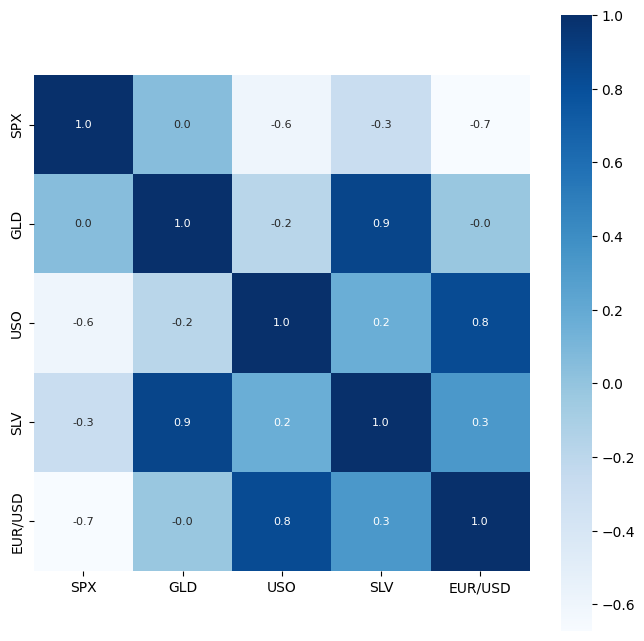

In [ ]:
#constructing a heatmap to understand the correlation
plt.figure(figsize= (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [ ]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


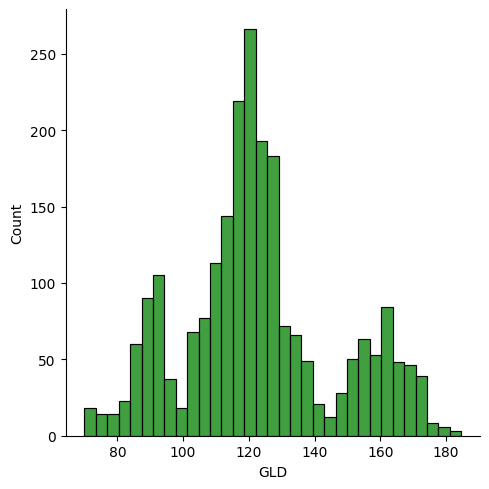

In [ ]:
#checking the distribution of the GLD price
sns.displot(gold_data['GLD'], color='green')

SPLITTING THE FEATURES AND TARGETS


In [ ]:
x= gold_data.drop(['Date','GLD'], axis=1)
y= gold_data['GLD']

In [ ]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


SPLITTING INTO TRANING DATA AND TEST DATA

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=2)

In [ ]:
len(x_train)

1832

In [ ]:
len(x_test)

458

MODEL TRAINING: RANDOM FOREST REGRESSOR


In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
#training the model
regressor.fit(x_train, y_train)

RandomForestRegressor()

MODEL EVALUTION

In [ ]:
#Prediction on test data
test_data_prediction = regressor.predict(x_test)

In [ ]:
print(test_data_prediction)

[168.43309854  82.20669988 115.89590056 127.5577007  120.62320161
 154.78089733 150.31179884 126.11630026 117.42619879 126.00180118
 116.83980054 171.23060075 141.67259848 167.79179793 115.05380015
 117.75440066 138.15330368 169.8416007  158.82060295 159.66429997
 155.15890008 125.15270007 176.17540006 157.17030366 125.2471002
  93.99019938  77.75609978 120.56590013 119.20389984 167.47170026
  88.00450086 124.97030027  91.17030062 117.77190026 121.05779882
 136.21800145 115.49020125 115.54310096 144.9695988  107.33650079
 103.7144024   87.28949795 126.55850082 118.07370055 154.50589937
 119.47210013 108.26770001 107.8822978   93.27200094 127.04519812
  74.75430066 113.73569907 121.29300008 111.21639902 118.97519887
 120.79049947 159.25910044 167.46230114 147.14899686  85.8219987
  94.52310019  86.77569901  90.6714     119.06820104 126.48320038
 127.62610062 169.76030039 122.22449944 117.4546991   98.2422006
 168.10239998 142.61499885 132.27900244 121.24610261 121.41549935
 119.74200064

In [ ]:
#R squared error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9897548242831709


COMPARE THE ACTUAL VALUES AND PERDICTED VALUES IN A PLOT


In [ ]:
y_test = list(y_test)

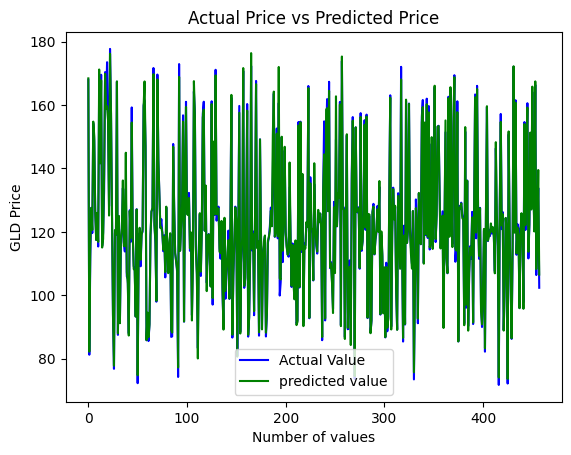

In [ ]:
plt.plot(y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='green', label='predicted value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()